# Digit Recognition using Image Classification

using tensorflow and keras

# Convolutional Neural Network

One of the most powerful supervised deep learning techniques is the Convolutional Neural Networks. CNNs are mainly used for image classification although you may find other application areas such as natural language processing.

We are capable of using many different layers in a convolutional neural network. However, convolution, pooling, and fully connect layers are the most important ones.

# Layers of CNN

1.Convolutional Layers

Convolutional layer is the very first layer where we extract features from the images in our datasets.

2.Pooling Layer

When constructing CNNs, it is common to insert pooling layers after each convolution layer to reduce the spatial size of the representation to reduce the parameter counts which reduces the computational complexity.

3.A Set of Fully Connected Layers

A fully connected network is our RegularNet where each parameter is linked to one another to determine the true relation and effect of each parameter on the labels.

In [1]:
# Train Test split
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

7


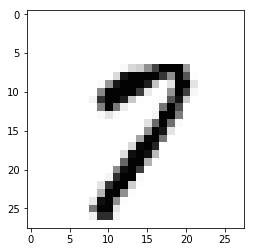

In [3]:
# Viewing randon index entry
import matplotlib.pyplot as plt
image_index = 9999
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
# reshaping the shape of train and test data for implementing in keras library
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train /= 255
x_test /= 255

In [8]:
input_shape = (28, 28, 1)
x_train.shape

(60000, 28, 28, 1)

In [9]:
# importing libraries for neural network construction
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

Using TensorFlow backend.


In [10]:
# neural network layers (including convolution)
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0,2))
model.add(Dense(10, activation=tf.nn.softmax))

In [11]:
# Compilimg and training the model
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(x=x_train, y=y_train, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 47s 786us/step - loss: 0.1848 - acc: 0.9438
Epoch 2/10
60000/60000 [==============================] - 46s 772us/step - loss: 0.0610 - acc: 0.9812
Epoch 3/10
60000/60000 [==============================] - 46s 771us/step - loss: 0.0372 - acc: 0.9881
Epoch 4/10
60000/60000 [==============================] - 47s 780us/step - loss: 0.0236 - acc: 0.9925
Epoch 5/10
60000/60000 [==============================] - 47s 780us/step - loss: 0.0182 - acc: 0.9938
Epoch 6/10
60000/60000 [==============================] - 47s 782us/step - loss: 0.0125 - acc: 0.9960
Epoch 7/10
60000/60000 [==============================] - 48s 793us/step - loss: 0.0107 - acc: 0.9964
Epoch 8/10
60000/60000 [==============================] - 50s 837us/step - loss: 0.0084 - acc: 0.9972
Epoch 9/10
60000/60000 [==============================] - 47s 788us/step - loss: 0.0071 - acc: 0.9978
Epoch 10/10
60000/60000 [==============================] - 48s 793us/step - loss: 

In [12]:
# testing the model for accuracy
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 2s 206us/step


[0.07867970041559093, 0.9838]

Accuracy = 98.38 %